In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv('Goodreads_books_with_genres.csv', encoding='latin-1', low_memory=False )
#books_url = pd.read_csv('books.csv', encoding='latin-1', low_memory=False )

In [3]:
#books_url

In [4]:
#books_url.rename(columns = {'ISBN':'isbn'}, inplace = True)
#books_url

In [5]:
books

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Chil..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780440e+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Chil..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,eng,352,6333,244,11/1/2003,Scholastic,"Fantasy;Fiction;Young Adult;Fantasy,Magic;Chil..."
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,"Fantasy;Fiction;Young Adult;Fantasy,Magic;Chil..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780440e+12,eng,2690,41428,164,9/13/2004,Scholastic,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Adve..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.781560e+12,eng,512,156,20,12/21/2004,Da Capo Press,"Fiction;Writing,Essays;Literature,American;The..."
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.780140e+12,eng,635,783,56,12/1/1988,Penguin Books,Fiction;Science Fiction;Literature;Novels;Lite...
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.780140e+12,eng,415,820,95,8/1/1993,Penguin Books,"Historical,Historical Fiction;Fiction;Novels;F..."
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9.780060e+12,eng,434,769,139,2/27/2007,Ecco,"Nonfiction;Sociology;Social Issues,Poverty;His..."


In [6]:
#books_merge = books.merge(books_url, on="isbn")
#books_merge

In [7]:
#books_merge.drop(columns =["Book-Title","Book-Author","Year-Of-Publication", "Publisher"])

# Clean Dataset

In [8]:
books.drop_duplicates(inplace=True)

In [9]:
books.duplicated().sum()

0

# Data Preprocessing

In [10]:
genre_labels = books['genres'].astype('category').cat.categories.tolist()
genre_mapping = { 'genres': {k: v for k,v in zip(genre_labels,list(range(1,len(genre_labels)+1)))}}
books.replace(genre_mapping, inplace=True)
genre_mapping

{'genres': {'Academic,Academics;Classics': 1,
  'Academic,Grad School;Cultural,Ireland;Nonfiction': 2,
  'Academic,School;History': 3,
  'Action;Childrens': 4,
  'Adult Fiction,Erotica;Art,Photography': 5,
  'Adult Fiction,Erotica;Erotica,Menage;Erotica,BDSM;Romance;Romance,Erotic Romance;Contemporary;Fiction;Anthologies;Menage,M F M;Romance,Contemporary Romance': 6,
  'Adult Fiction,Erotica;Fiction;Classics;Erotica,BDSM;Romance;Cultural,France;Sexuality;Adult;Literature;European Literature,French Literature': 7,
  'Adult Fiction,Erotica;Fiction;Fantasy;Romance;Erotica,BDSM;Adult;Fantasy,Fairy Tales;Adult Fiction;Retellings;Sexuality': 8,
  'Adult Fiction,Erotica;Fiction;Fantasy;Romance;Erotica,BDSM;Adult;Fantasy,Fairy Tales;Adult Fiction;Sexuality;Womens Fiction,Chick Lit': 9,
  'Adult Fiction,Erotica;Fiction;Fantasy;Romance;Erotica,BDSM;Adult;Fantasy,Fairy Tales;Dark;Adult Fiction;Sexuality': 10,
  'Adult Fiction,Erotica;Fiction;Romance;Erotica,BDSM;Fantasy;Adult;Contemporary;Horror;

In [14]:
genre_labels

['Academic,Academics;Classics',
 'Academic,Grad School;Cultural,Ireland;Nonfiction',
 'Academic,School;History',
 'Action;Childrens',
 'Adult Fiction,Erotica;Art,Photography',
 'Adult Fiction,Erotica;Erotica,Menage;Erotica,BDSM;Romance;Romance,Erotic Romance;Contemporary;Fiction;Anthologies;Menage,M F M;Romance,Contemporary Romance',
 'Adult Fiction,Erotica;Fiction;Classics;Erotica,BDSM;Romance;Cultural,France;Sexuality;Adult;Literature;European Literature,French Literature',
 'Adult Fiction,Erotica;Fiction;Fantasy;Romance;Erotica,BDSM;Adult;Fantasy,Fairy Tales;Adult Fiction;Retellings;Sexuality',
 'Adult Fiction,Erotica;Fiction;Fantasy;Romance;Erotica,BDSM;Adult;Fantasy,Fairy Tales;Adult Fiction;Sexuality;Womens Fiction,Chick Lit',
 'Adult Fiction,Erotica;Fiction;Fantasy;Romance;Erotica,BDSM;Adult;Fantasy,Fairy Tales;Dark;Adult Fiction;Sexuality',
 'Adult Fiction,Erotica;Fiction;Romance;Erotica,BDSM;Fantasy;Adult;Contemporary;Horror;Romance,Erotic Romance;Adult Fiction',
 'Adult Ficti

In [15]:
Y = books.iloc[:20,[1,3,12]]
features = ['genres', 'average_rating']
X_main = books[features]
Y

,Title,average_rating,genres
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,2267.0
1,Harry Potter and the Order of the Phoenix (Har...,4.49,2267.0
2,Harry Potter and the Chamber of Secrets (Harry...,4.42,2072.0
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,2071.0
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,2264.0
5,"Unauthorized Harry Potter Book Seven News: ""Ha...",3.74,2329.0
6,Harry Potter Collection (Harry Potter #1-6),4.73,2074.0
7,The Ultimate Hitchhiker's Guide: Five Complete...,4.38,7655.0
8,The Ultimate Hitchhiker's Guide to the Galaxy ...,4.38,7655.0
9,The Hitchhiker's Guide to the Galaxy (Hitchhik...,4.22,7654.0


Text(0, 0.5, 'Average Rating')

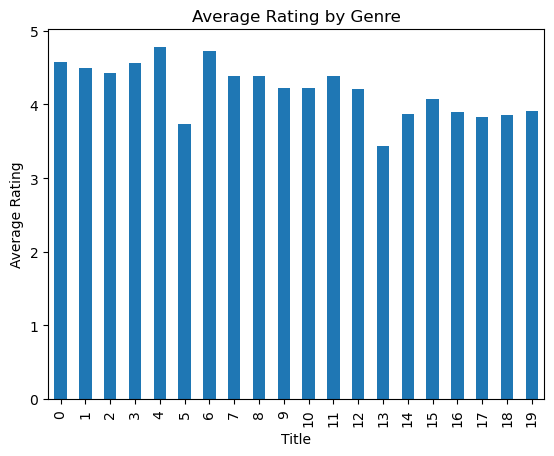

In [16]:
Y.plot(kind='bar', y='average_rating', legend=False)

plt.title('Average Rating by Genre')
plt.xlabel('Title')
plt.ylabel('Average Rating')

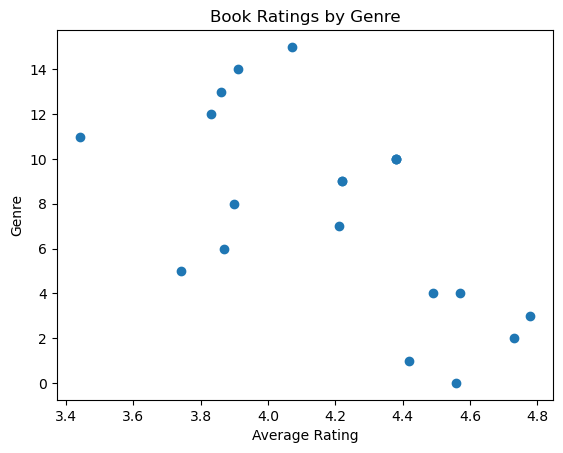

In [17]:



plt.scatter(x=Y['average_rating'], y=Y['genres'].astype('category').cat.codes, cmap='viridis')
plt.title('Book Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

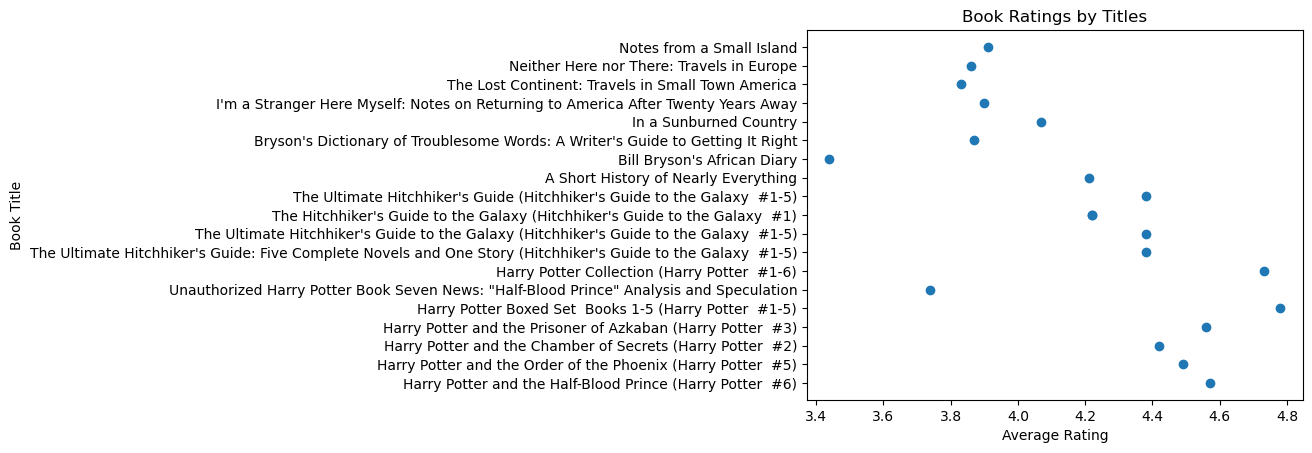

In [18]:
plt.scatter(x=Y['average_rating'], y=Y['Title'])
plt.title('Book Ratings by Titles')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.show()

In [19]:
X_main

,genres,average_rating
0,2267.0,4.57
1,2267.0,4.49
2,2072.0,4.42
3,2071.0,4.56
4,2264.0,4.78
...,...,...
11122,3815.0,4.06
11123,3578.0,4.08
11124,4137.0,3.96
11125,6250.0,3.72


In [20]:
X_main

,genres,average_rating
0,2267.0,4.57
1,2267.0,4.49
2,2072.0,4.42
3,2071.0,4.56
4,2264.0,4.78
...,...,...
11122,3815.0,4.06
11123,3578.0,4.08
11124,4137.0,3.96
11125,6250.0,3.72


In [21]:
X_main.fillna(0, inplace = True)

C:\Users\HELLO\AppData\Local\Temp\ipykernel_2612\3024566235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_main.fillna(0, inplace = True)


In [22]:
from sklearn.model_selection import train_test_split
#how to test and train a data
X_train, X_test = train_test_split(X_main, test_size =0.2, random_state= 1)
X_test

,genres,average_rating
9914,4985.0,3.77
4437,2945.0,3.89
5140,4222.0,3.68
2617,3816.0,3.77
4804,5038.0,3.96
...,...,...
8685,8164.0,3.74
2809,2661.0,3.67
420,1299.0,4.50
6566,8971.0,3.58


In [23]:
from sklearn.neighbors import NearestNeighbors
knn_model = NearestNeighbors(algorithm = 'brute',n_neighbors=5, metric='cosine')
knn_model.fit(X_main)

NearestNeighbors(algorithm='brute', metric='cosine')

In [24]:
book = [[30, 4.5]] # Genre = 3, Rating = 4.5
distances, indices = knn_model.kneighbors(book)

C:\Users\HELLO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [25]:
books["genres"].iloc[1]

2267.0

In [26]:
distances

array([[1.63915057e-06, 2.20689051e-05, 3.41540551e-05, 6.66522505e-05,
        7.94782316e-05]])

In [27]:
indices

array([[10289, 10303, 10287, 10291,  8938]], dtype=int64)

In [28]:
def get_books(x_genres, y_rating):
    bookss = [[x_genres,y_rating]]
    distances, indices = knn_model.kneighbors(bookss)
    
    for i in indices[0]:
        print(books.loc[i]['Title'])


In [29]:
get_books(3,4.5)

The Earth and Its Peoples: Volume II
A Farewell to Arms?: Beyond the Good Friday Agreement
The Spy Who Barked (Adam Sharp #1)
The Illustrated Story Of O
Cliffs Notes on Fitzgerald's the Great Gatsby


C:\Users\HELLO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [30]:
import pickle
pickle.dump(knn_model, open('model.pkl','wb'))
pickle.dump(books, open('booksMerge.pkl','wb'))
pickle.dump(genre_labels, open('genrelabels.pkl','wb'))

In [ ]:
books

In [13]:
print('Recommended books:')
for i in indices[0]:
    print(books.loc[i]['Title'])

Recommended books:


NameError: name 'indices' is not defined

In [88]:

# Function to get book recommendations based on a given genre
#def get_recommendations(genre, cosine_sim=cosine_sim):
    # Create a Series of the book titles and their corresponding indices
    #indices = pd.Series(books.index, index=books['title'])
    
    # Get the index of the genre in the genres column
    #genre_index = books['genres'].apply(lambda x: genre.lower() in x.lower()).values.nonzero()[0]
    
    # Get the cosine similarity scores of the books in the genre
    #sim_scores = list(enumerate(cosine_sim[genre_index]))
    
    # Sort the books by their cosine similarity scores in descending order
    #sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the top 10 most similar books
    #book_indices = [i[0] for i in sim_scores][:10]
    
    # Return the titles of the top 10 most similar books
    #return books['title'].iloc[book_indices]

# Example usage
#get_recommendations('romance')


# Second shown code

In [198]:
stop_words = ['eng',"Title"]
tfidf = TfidfVectorizer(stop_words='english')


In [199]:
tfidf_matrix = tfidf.fit_transform(books['publisher'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [200]:
def get_top_books_by_genre(genre,  n=5):
    # Filter books by genre
    genre_books = books[books['genres'] == genre]

    # Get the indices of genre books
    genre_book_indices = genre_books.index.tolist()

    # Compute the average similarity scores between genre books and all other books
    similarity_scores = cosine_sim[genre_book_indices].mean(axis=0)

    # Get the indices of top n similar books
    top_book_indices = np.argsort(-similarity_scores)[:5]

    # Return the top n similar books
    return books["Title"].iloc[genre_book_indices]

In [201]:
get_top_books_by_genre("Fiction")

C:\Users\HELLO\AppData\Local\Temp\ipykernel_13480\2278052046.py:9: RuntimeWarning: Mean of empty slice.
  similarity_scores = cosine_sim[genre_book_indices].mean(axis=0)
C:\Users\HELLO\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


Series([], Name: Title, dtype: object)